In [118]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas_profiling
import os
pd.set_option('display.max_columns',None)

In [119]:
# Changing path
os.chdir('/../../../mnt') 
# Transacction Path
input_PATH = 's3-refined-popular/data_orig/transacciones/tarjeta-credito/'
output_PATH = 's3-refined/old/Fraude/Transacciones/'

In [131]:
## Reading file
file_name_201910 = os.path.join(input_PATH,'transacciones_tarjeta-credito_repgesco-masterfile_M201910.csv')
file_name_201911 = os.path.join(input_PATH,'transacciones_tarjeta-credito_repgesco-masterfile_M201911.csv')
file_name_201912 = os.path.join(input_PATH,'transacciones_tarjeta-credito_repgesco-masterfile_M201912.csv')
file_name_202002 = os.path.join(input_PATH,'transacciones_tarjeta-credito_repgesco-masterfile_M202002.csv')

dates = ['FECHA_COMPROBANTE','FECHA_PROCESO','FECHA_PERIODO']

data_tx_tdc_201910 = pd.read_csv(file_name_201910,sep='|',encoding='latin-1', parse_dates=dates)
data_tx_tdc_201911 = pd.read_csv(file_name_201911,sep='|',encoding='latin-1', parse_dates=dates)
data_tx_tdc_201912 = pd.read_csv(file_name_201912,sep='|',encoding='latin-1', parse_dates=dates)
data_tx_tdc_202002 = pd.read_csv(file_name_202002,sep='|',encoding='latin-1', parse_dates=dates)

data_tx_tdc = pd.concat([data_tx_tdc_201910, data_tx_tdc_201911, data_tx_tdc_201912, data_tx_tdc_202002])

In [141]:
data_tx_tdc.count()/len(data_tx_tdc)

TIPO_ID                   0.999995
TIPO_ID_HOMOL             0.999995
CONT_ID                   0.829915
IDENTIFICACION_CLIENTE    0.000000
NRO_CUENTA                1.000000
NUMERO_TARJETA            1.000000
BIN                       1.000000
COD_UNICO_TRX             1.000000
DESCRIPCION_TRX           0.999995
FECHA_COMPROBANTE         1.000000
FECHA_PROCESO             1.000000
TIPO_DE_PRODUCTO_TC       0.745749
CODIGO_SERVICIO           0.255460
VALOR_TOTAL               0.999991
VALOR_IVA                 0.255460
VALOR_PROPINA             0.255451
REFERENCIA                0.255451
TIPO_TRANSACCION          0.255451
NOMBRE_COMERCIO           0.999991
CIUDAD_COMERCIO           0.999994
ESTADO_COMERCIO           0.255460
FECHA_TRX_INT             1.000000
VALOR_MONEDA_ORIGEN       0.255451
COD_MONEDA_ORIGEN         1.000000
MODULO_LOGICO             0.255451
COD_AUTORIZA              0.041187
MCC                       0.255451
COD_ESTABLE               0.046439
CUOTAS              

In [142]:
data_tx_tdc.shape

(15843302, 32)

In [143]:
data_tx_tdc = data_tx_tdc.drop_duplicates()
data_tx_tdc.columns = data_tx_tdc.columns.str.lower()

print(data_tx_tdc.shape)
print(data_tx_tdc.columns)
data_tx_tdc.head()

(15274122, 32)
Index(['tipo_id', 'tipo_id_homol', 'cont_id', 'identificacion_cliente',
       'nro_cuenta', 'numero_tarjeta', 'bin', 'cod_unico_trx',
       'descripcion_trx', 'fecha_comprobante', 'fecha_proceso',
       'tipo_de_producto_tc', 'codigo_servicio', 'valor_total', 'valor_iva',
       'valor_propina', 'referencia', 'tipo_transaccion', 'nombre_comercio',
       'ciudad_comercio', 'estado_comercio', 'fecha_trx_int',
       'valor_moneda_origen', 'cod_moneda_origen', 'modulo_logico',
       'cod_autoriza', 'mcc', 'cod_estable', 'cuotas', 'referen_universal',
       'fuente', 'fecha_periodo'],
      dtype='object')


,tipo_id,tipo_id_homol,cont_id,identificacion_cliente,nro_cuenta,numero_tarjeta,bin,cod_unico_trx,descripcion_trx,fecha_comprobante,fecha_proceso,tipo_de_producto_tc,codigo_servicio,valor_total,valor_iva,valor_propina,referencia,tipo_transaccion,nombre_comercio,ciudad_comercio,estado_comercio,fecha_trx_int,valor_moneda_origen,cod_moneda_origen,modulo_logico,cod_autoriza,mcc,cod_estable,cuotas,referen_universal,fuente,fecha_periodo
0,NaN,NaN,NaN,NaN,421171,******,,,,17/10/2019,2019-10-17,NaN,NaN,134134.16,NaN,NaN,NaN,NaN,,,NaN,17/10/2019,NaN,170.,NaN,NaN,NaN,NaN,0.0,NaN,REPGESCODES,10/2019
1,NaN,NaN,NaN,NaN,421171,474638******2387,474638,000020000005300,,15/10/2019,2019-10-15,Expres,NaN,77000.00,NaN,NaN,NaN,NaN,,,NaN,15/10/2019,NaN,170.,NaN,NaN,NaN,NaN,0.0,NaN,REPGESCODES,10/2019
2,NaN,NaN,NaN,NaN,421171,474638******9310,474638,000000015923865,C/DORA MUND HOTEL TRAV CL,15/10/2019,2019-10-15,Expres,NaN,347.35,NaN,NaN,NaN,NaN,C/DORA MUND HOTEL TRAV CL,,NaN,15/10/2019,NaN,170.,NaN,NaN,NaN,NaN,36.0,NaN,REPGESCODES,10/2019
3,NaN,NaN,NaN,NaN,421171,474638******9310,474638,000000015923865,C/DORA MUND HOTEL TRAV CL,15/10/2019,2019-10-15,Expres,NaN,4469.11,NaN,NaN,NaN,NaN,C/DORA MUND HOTEL TRAV CL,,NaN,15/10/2019,NaN,170.,NaN,NaN,NaN,NaN,36.0,NaN,REPGESCODES,10/2019
4,NaN,NaN,NaN,NaN,421171,******,,,,02/10/2019,2019-10-17,NaN,NaN,296.78,NaN,NaN,NaN,NaN,,,NaN,17/10/2019,NaN,170.,NaN,NaN,NaN,NaN,0.0,NaN,REPGESCODES,10/2019


In [144]:
data_tx_tdc.dtypes

tipo_id                           object
tipo_id_homol                    float64
cont_id                          float64
identificacion_cliente           float64
nro_cuenta                         int64
numero_tarjeta                    object
bin                               object
cod_unico_trx                     object
descripcion_trx                   object
fecha_comprobante                 object
fecha_proceso             datetime64[ns]
tipo_de_producto_tc               object
codigo_servicio                   object
valor_total                      float64
valor_iva                        float64
valor_propina                    float64
referencia                        object
tipo_transaccion                  object
nombre_comercio                   object
ciudad_comercio                   object
estado_comercio                   object
fecha_trx_int                     object
valor_moneda_origen               object
cod_moneda_origen                 object
modulo_logico   

In [145]:
# Cast date variable
data_tx_tdc['fecha_comprobante'] = pd.to_datetime(data_tx_tdc['fecha_comprobante'], infer_datetime_format=True, errors='coerce')
data_tx_tdc['date'] = pd.to_datetime(data_tx_tdc['fecha_proceso']).dt.to_period('m')
data_tx_tdc['fecha_periodo'] = pd.to_datetime(data_tx_tdc['fecha_periodo'], infer_datetime_format=True, errors='coerce')

# data_tx_tdc['cont_id'] = data_tx_tdc['cont_id'].astype(str)

# Pend revisar -> codigo_servicio

In [146]:
data_tx_tdc.head()

,tipo_id,tipo_id_homol,cont_id,identificacion_cliente,nro_cuenta,numero_tarjeta,bin,cod_unico_trx,descripcion_trx,fecha_comprobante,fecha_proceso,tipo_de_producto_tc,codigo_servicio,valor_total,valor_iva,valor_propina,referencia,tipo_transaccion,nombre_comercio,ciudad_comercio,estado_comercio,fecha_trx_int,valor_moneda_origen,cod_moneda_origen,modulo_logico,cod_autoriza,mcc,cod_estable,cuotas,referen_universal,fuente,fecha_periodo,date
0,NaN,NaN,NaN,NaN,421171,******,,,,2019-10-17,2019-10-17,NaN,NaN,134134.16,NaN,NaN,NaN,NaN,,,NaN,17/10/2019,NaN,170.,NaN,NaN,NaN,NaN,0.0,NaN,REPGESCODES,2019-10-01,2019-10
1,NaN,NaN,NaN,NaN,421171,474638******2387,474638,000020000005300,,2019-10-15,2019-10-15,Expres,NaN,77000.00,NaN,NaN,NaN,NaN,,,NaN,15/10/2019,NaN,170.,NaN,NaN,NaN,NaN,0.0,NaN,REPGESCODES,2019-10-01,2019-10
2,NaN,NaN,NaN,NaN,421171,474638******9310,474638,000000015923865,C/DORA MUND HOTEL TRAV CL,2019-10-15,2019-10-15,Expres,NaN,347.35,NaN,NaN,NaN,NaN,C/DORA MUND HOTEL TRAV CL,,NaN,15/10/2019,NaN,170.,NaN,NaN,NaN,NaN,36.0,NaN,REPGESCODES,2019-10-01,2019-10
3,NaN,NaN,NaN,NaN,421171,474638******9310,474638,000000015923865,C/DORA MUND HOTEL TRAV CL,2019-10-15,2019-10-15,Expres,NaN,4469.11,NaN,NaN,NaN,NaN,C/DORA MUND HOTEL TRAV CL,,NaN,15/10/2019,NaN,170.,NaN,NaN,NaN,NaN,36.0,NaN,REPGESCODES,2019-10-01,2019-10
4,NaN,NaN,NaN,NaN,421171,******,,,,2019-10-02,2019-10-17,NaN,NaN,296.78,NaN,NaN,NaN,NaN,,,NaN,17/10/2019,NaN,170.,NaN,NaN,NaN,NaN,0.0,NaN,REPGESCODES,2019-10-01,2019-10


In [169]:
# Conteo por fechas
no_transacciones = data_tx_tdc['fecha_periodo'].value_counts().sort_index().reset_index(name='conteo_transaccion')
no_transacciones

,index,conteo_transaccion
0,2019-10-01,4282980
1,2019-11-01,2888755
2,2019-12-01,4293828
3,2020-02-01,3808431


Text(0, 0.5, 'Numero de transacciones')

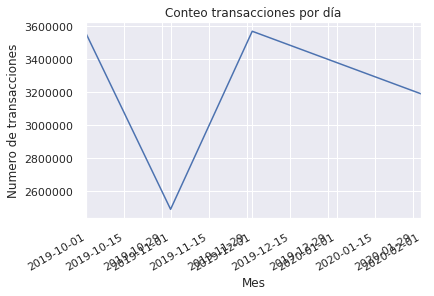

In [170]:
data_tx_tdc.groupby(['fecha_periodo'])['cont_id'].count().plot(title='Conteo transacciones por día')
plt.xlabel('Mes')
plt.ylabel('Numero de transacciones')

In [148]:
data_tx_tdc['llave'] = [str(x)+'_'+str(y) for x,y in zip(data_tx_tdc['cont_id'],data_tx_tdc['nro_cuenta'])]

In [149]:
# Porcentaje cruce:

str_dates = list(pd.Series(data_tx_tdc['fecha_periodo'].unique()).sort_values())
dates = list(pd.Series(data_tx_tdc['fecha_periodo'].unique()).sort_values())[1:]

for ix,date in enumerate(dates):
    print('Fecha:',date)
    id_temp = data_tx_tdc.loc[data_tx_tdc['fecha_periodo'] == str_dates[ix],'llave'].unique()
    temp = data_tx_tdc[data_tx_tdc['fecha_periodo'] == date]
    temp['originacion'] = np.where(temp['llave'].isin(id_temp),0,1)
    if ix == 0:
        df_final = temp
    else:
        df_final = pd.concat([df_final,temp],ignore_index=True)
    del id_temp, temp

Fecha: 2019-11-01 00:00:00


/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Fecha: 2019-12-01 00:00:00
Fecha: 2020-02-01 00:00:00
Fecha: NaT


In [150]:
df_final.columns

Index(['tipo_id', 'tipo_id_homol', 'cont_id', 'identificacion_cliente',
       'nro_cuenta', 'numero_tarjeta', 'bin', 'cod_unico_trx',
       'descripcion_trx', 'fecha_comprobante', 'fecha_proceso',
       'tipo_de_producto_tc', 'codigo_servicio', 'valor_total', 'valor_iva',
       'valor_propina', 'referencia', 'tipo_transaccion', 'nombre_comercio',
       'ciudad_comercio', 'estado_comercio', 'fecha_trx_int',
       'valor_moneda_origen', 'cod_moneda_origen', 'modulo_logico',
       'cod_autoriza', 'mcc', 'cod_estable', 'cuotas', 'referen_universal',
       'fuente', 'fecha_periodo', 'date', 'llave', 'originacion'],
      dtype='object')

In [236]:
activos_df_tc_expr = data_tx_tdc[df_final['tipo_de_producto_tc']=='Expres']
activos_df_tc_la14 = data_tx_tdc[df_final['tipo_de_producto_tc']=='LA 14']
activos_df_tc_trad = data_tx_tdc[df_final['tipo_de_producto_tc']=='TRADICIONAL']

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pd.merge(activos_df_tc_trad.groupby(['fecha_periodo'])['originacion'].sum().reset_index(name='conteo_trad'),
         activos_df_tc_expr.groupby(['fecha_periodo'])['originacion'].sum().reset_index(name='conteo_expr'),
         activos_df_tc_la14.groupby(['fecha_periodo'])['originacion'].sum().reset_index(name='conteo_14'),
         on='fecha_periodo')

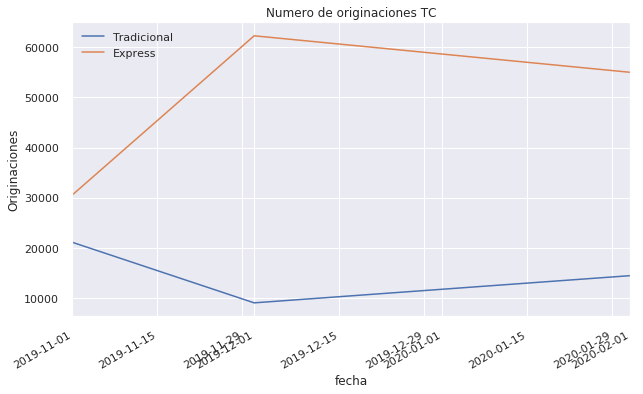

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
activos_df_tc_trad.groupby(['fecha_periodo'])['originacion'].sum().plot()
activos_df_tc_expr.groupby(['fecha_periodo'])['originacion'].sum().plot()
plt.title('Numero de originaciones TC')
plt.xlabel('fecha')
plt.ylabel('Originaciones')
plt.legend(('Tradicional', 'Express'))

In [251]:
# Conteo por fechas
no_transacciones_expr = activos_df_tc_expr['fecha_periodo'].value_counts().sort_index().reset_index(name='conteo_transaccion_expr')
no_transacciones_la14 = activos_df_tc_la14['fecha_periodo'].value_counts().sort_index().reset_index(name='conteo_transaccion_la14')
no_transacciones_trad = activos_df_tc_trad['fecha_periodo'].value_counts().sort_index().reset_index(name='conteo_transaccion_trad')

In [262]:
conteo_x_cliente_expr = activos_df_tc_expr.groupby(['fecha_periodo','llave'])['llave'].count().reset_index(name='conteo')

no_clientes_expr = conteo_x_cliente_expr.groupby(['fecha_periodo'])['llave'].count().reset_index(name='conteo_cliente_producto_expr')

result_expr = pd.merge(no_transacciones_expr,
                       no_clientes_expr,
                  left_on='index', right_on='fecha_periodo')
result_expr = result_expr.drop(['fecha_periodo'], axis=1)

result_expr['mean_expr'] = result_expr['conteo_transaccion_expr']/result_expr['conteo_cliente_producto_expr']
result_expr

,index,conteo_transaccion_expr,conteo_cliente_producto_expr,mean_expr
0,2019-10-01,1529552,138815,11.018636
1,2019-11-01,1112074,129119,8.612784
2,2019-12-01,1528637,145022,10.540725
3,2020-02-01,1412801,139890,10.099371


In [263]:
conteo_x_cliente_la14 = activos_df_tc_la14.groupby(['fecha_periodo','llave'])['llave'].count().reset_index(name='conteo')

no_clientes_la14 = conteo_x_cliente_la14.groupby(['fecha_periodo'])['llave'].count().reset_index(name='conteo_cliente_producto_la14')

result_la14 = pd.merge(no_transacciones_la14,
                       no_clientes_la14,
                  left_on='index', right_on='fecha_periodo')
result_la14 = result_la14.drop(['fecha_periodo'], axis=1)

result_la14['mean_la14'] = result_la14['conteo_transaccion_la14']/result_la14['conteo_cliente_producto_la14']
result_la14

,index,conteo_transaccion_la14,conteo_cliente_producto_la14,mean_la14
0,2019-10-01,299068,35457,8.434667
1,2019-11-01,235136,33803,6.956069
2,2019-12-01,302064,36687,8.233543
3,2020-02-01,253511,32634,7.768309


In [264]:
conteo_x_cliente_trad = activos_df_tc_trad.groupby(['fecha_periodo','llave'])['llave'].count().reset_index(name='conteo')

no_clientes_trad = conteo_x_cliente_trad.groupby(['fecha_periodo'])['llave'].count().reset_index(name='conteo_cliente_producto_trad')

result_trad = pd.merge(no_transacciones_trad,
                       no_clientes_trad,
                  left_on='index', right_on='fecha_periodo')
result_trad = result_trad.drop(['fecha_periodo'], axis=1)

result_trad['mean_trad'] = result_trad['conteo_transaccion_trad']/result_trad['conteo_cliente_producto_trad']
result_trad

,index,conteo_transaccion_trad,conteo_cliente_producto_trad,mean_trad
0,2019-10-01,1691907,118795,14.242241
1,2019-11-01,1071413,102003,10.503740
2,2019-12-01,1698654,124206,13.676103
3,2020-02-01,1481025,115805,12.788956


In [270]:
result = pd.merge(result_la14,
                  result_expr,
                  on='index')
result = pd.merge(result,
                  result_trad,
                  on='index')
result

,index,conteo_transaccion_la14,conteo_cliente_producto_la14,mean_la14,conteo_transaccion_expr,conteo_cliente_producto_expr,mean_expr,conteo_transaccion_trad,conteo_cliente_producto_trad,mean_trad
0,2019-10-01,299068,35457,8.434667,1529552,138815,11.018636,1691907,118795,14.242241
1,2019-11-01,235136,33803,6.956069,1112074,129119,8.612784,1071413,102003,10.503740
2,2019-12-01,302064,36687,8.233543,1528637,145022,10.540725,1698654,124206,13.676103
3,2020-02-01,253511,32634,7.768309,1412801,139890,10.099371,1481025,115805,12.788956
